## pull variant frequencies

### library and data path

In [37]:
library(tidyverse)
library(ggrepel)
library(httr)
library(jsonlite)


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [3]:
data_dir = file.path("~/bms-dms/sumstats")
list.files(data_dir)
# Load the data


[1] "TYK2-FLOW-flow-cleaned.midpoints.tsv"   
[2] "TYK2-run3-combined-cleaned.sumstats.tsv"
[3] "TYK2-run4-combined-cleaned.sumstats.tsv"
[4] "TYK2-run7-combined-cleaned.sumstats.tsv"
[5] "TYK2.contrast.tsv"

### re generate tabulated data

In [4]:
assay1 <- read_tsv("../sumstats/TYK2-run3-combined-cleaned.sumstats.tsv", show_col_types = FALSE) %>%
  mutate(assay = "assay1") %>% select(-version) %>%
  mutate(aa = if_else(aa %in% c("X", "Stop", "*"), "Stop", aa))

assay2 <- read_tsv("../sumstats/TYK2-run4-combined-cleaned.sumstats.tsv", show_col_types = FALSE) %>%
  mutate(assay = "assay2") %>% select(-version) %>%
  mutate(aa = if_else(aa %in% c("X", "Stop", "*"), "Stop", aa))

assay3 <- read_tsv("../sumstats/TYK2-run7-combined-cleaned.sumstats.tsv", show_col_types = FALSE) %>%
  mutate(assay = "assay3") %>% select(-version) %>%
  mutate(aa = if_else(aa %in% c("X", "Stop", "*"), "Stop", aa))

flow_data <- read_tsv("../sumstats/TYK2-FLOW-flow-cleaned.midpoints.tsv", show_col_types = FALSE) %>%
  mutate(aa = if_else(aa %in% c("X", "Stop", "*"), "Stop", aa))

assay_data <- bind_rows(assay1, assay2, assay3)  %>%
    group_by(assay) %>%
    mutate(fdr = p.adjust(p.value, method = "BH")) %>%
    ungroup()

treated <- assay_data %>% filter(condition != "None_0")
untreated <- assay_data %>%
  filter(condition == "None_0") %>%
  rename("log2FoldChange_Control" = "log2FoldChange",
         "log2StdError_Control" = "log2StdError") %>%
  select(-condition, -statistic, -p.value, -fdr)

sumstats <- inner_join(treated, untreated, by = c("chunk", "pos", "aa", "assay"))

In [5]:
head(sumstats)

chunk,pos,condition,aa,log2FoldChange,log2StdError,statistic,p.value,assay,fdr,log2FoldChange_Control,log2StdError_Control
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
16,1051,IFNalpha_1,Stop,-0.32827896,0.5119714,-0.6412057,0.5213890442,assay1,0.83246901,0.5148870,0.5085672
16,1051,IFNalpha_10,Stop,-1.42526137,0.5963387,-2.3900198,0.0168474632,assay1,0.15664172,0.5148870,0.5085672
16,1051,IFNalpha_100,Stop,-1.91648342,0.5695281,-3.3650377,0.0007653319,assay1,0.01405539,0.5148870,0.5085672
16,1051,IFNalphaWithDrug_100,Stop,-0.16611366,0.5903476,-0.2813828,0.7784168280,assay1,0.93976436,0.5148870,0.5085672
16,1051,IFNbeta_100,Stop,0.49161868,0.4514839,1.0888952,0.2762000867,assay1,0.66716954,0.5148870,0.5085672
16,1051,IFNalpha_1,A,0.08283352,0.2762934,0.2998028,0.7643275941,assay1,0.93502902,0.3452057,0.2791116


In [6]:
contrast_sumstats <- read_tsv(file.path(data_dir, 'TYK2.contrast.tsv'))

Rows: 332371 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): chunk, condition, aa, assay
dbl (13): pos, log2FoldChange, log2StdError, statistic, p.value, fdr, log2Fo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
contrast_sumstats |> head()

chunk,pos,condition,aa,log2FoldChange,log2StdError,statistic,p.value,assay,fdr,log2FoldChange_Control,log2StdError_Control,log2Contrast,log2ContrastError,statistic_contrast,p.value_contrast,fdr_contrast
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,1051,IFNalpha_1,Stop,-0.32827896,0.5119714,-0.6412057,0.5213890442,assay1,0.83246901,0.5148870,0.5085672,-0.84316601,0.7216337,-1.16841266,0.242640353,0.77117824
16,1051,IFNalpha_10,Stop,-1.42526137,0.5963387,-2.3900198,0.0168474632,assay1,0.15664172,0.5148870,0.5085672,-1.94014841,0.7837477,-2.47547573,0.013305881,0.17362141
16,1051,IFNalpha_100,Stop,-1.91648342,0.5695281,-3.3650377,0.0007653319,assay1,0.01405539,0.5148870,0.5085672,-2.43137047,0.7635462,-3.18431348,0.001450978,0.02954594
16,1051,IFNalphaWithDrug_100,Stop,-0.16611366,0.5903476,-0.2813828,0.7784168280,assay1,0.93976436,0.5148870,0.5085672,-0.68100071,0.7791989,-0.87397544,0.382131630,0.86131371
16,1051,IFNbeta_100,Stop,0.49161868,0.4514839,1.0888952,0.2762000867,assay1,0.66716954,0.5148870,0.5085672,-0.02326836,0.6800576,-0.03421528,0.972705481,0.99692239
16,1051,IFNalpha_1,A,0.08283352,0.2762934,0.2998028,0.7643275941,assay1,0.93502902,0.3452057,0.2791116,-0.26237214,0.3927357,-0.66806297,0.504093400,0.91051558


In [8]:
colors <- c("Neither" = "gray",
            "Both" = "purple",
            "BMS-986202" = "red",
            "Zasocitinib" = "blue")

aa_order <- c("G","A","P","K","H",
              "R","T","S","C","E",
              "D","M","V","I","L",
              "Y","W","F","Q","N")

source("../src/model_utils.R")

plot_chemical_footprint <- function(data) {

    to_return <- data %>%
        ggplot(aes(text = str_c(pos, aa))) +
        geom_tile(aes(x = as.factor(pos),
                      y = fct_rev(aa),
                      fill = `FDR < 0.01`)) +
        scale_fill_manual(values = colors) +
        xlab("Position") + ylab("") +
        facet_grid(scale = "free_x",
                   space = "free")

    return(to_return)
}


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract





Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Warning message in checkDepPackageVersion(dep_pkg = "TMB"):
“Package version inconsistency detected.
glmmTMB was built with TMB version 1.9.17
Current TMB version is 1.9.18
Please re-install glmmTMB from source or restore original ‘TMB’ package (see '?reinstalling' for more information)”
Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



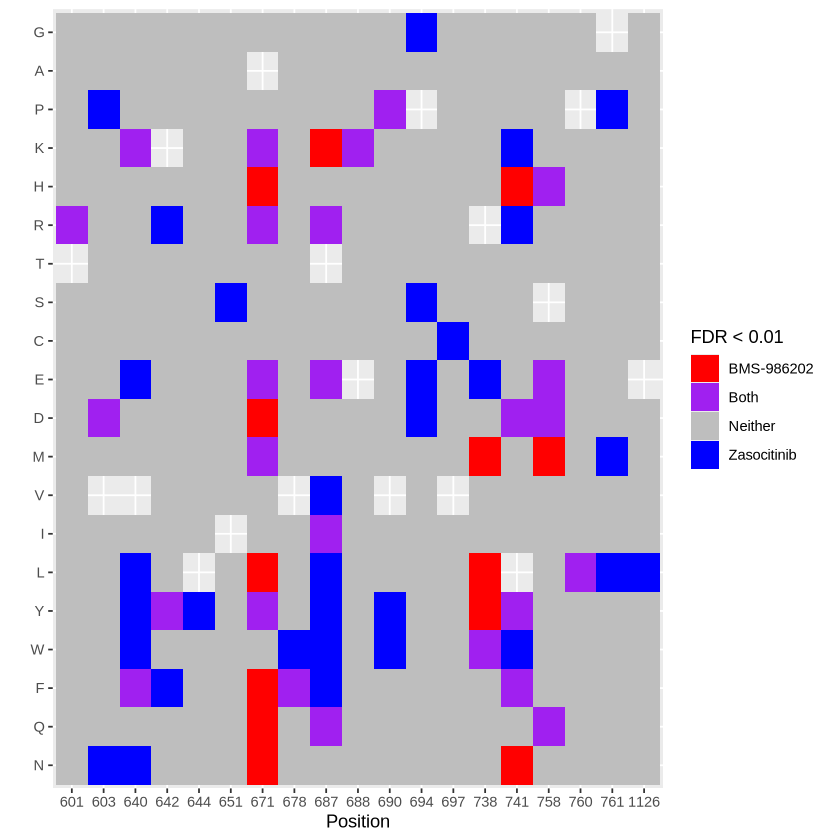

In [9]:
### Chemical Footprints

sumstats_resist <- contrast_sumstats %>%
    filter(assay == "assay2",
           condition %in% c("IFNalpha+Zasocitinib_1e-06", "IFNalpha+BMS-986202_1e-06"),
           aa %in% aa_order) %>%
    select(pos, condition, aa, statistic_contrast, fdr_contrast) %>%
    pivot_wider(names_from = condition, values_from = c(statistic_contrast, fdr_contrast)) %>%
    mutate(`FDR < 0.01` = case_when(`fdr_contrast_IFNalpha+BMS-986202_1e-06` < 0.01 & `fdr_contrast_IFNalpha+Zasocitinib_1e-06` < 0.01 ~ "Both",
                           `fdr_contrast_IFNalpha+BMS-986202_1e-06` < 0.01 & `fdr_contrast_IFNalpha+Zasocitinib_1e-06` > 0.01 ~ "BMS-986202",
                           `fdr_contrast_IFNalpha+BMS-986202_1e-06` > 0.01 & `fdr_contrast_IFNalpha+Zasocitinib_1e-06` < 0.01 ~ "Zasocitinib",
                           TRUE ~ "Neither"),
          `FDR < 0.01` = if_else(`statistic_contrast_IFNalpha+Zasocitinib_1e-06` < 0 & `statistic_contrast_IFNalpha+BMS-986202_1e-06` < 0,
                                 "Neither",
                                 `FDR < 0.01`),
          aa = if_else(aa %in% c("*", "X"), "*", aa),
          aa = factor(aa, levels = c("WT", aa_order)))

sig_positions_resist <- sumstats_resist %>% filter(`FDR < 0.01` != "Neither") %>% pull(pos) %>% unique()
prepped_data_resist <- sumstats_resist %>% filter(pos %in% sig_positions_resist)
names(prepped_data_resist) <- c("pos", "aa", "Z_BMS", "Z_ZASO",
                                "FDR_BMS", "FDR_ZASO", "FDR < 0.01")

plot_chemical_footprint(prepped_data_resist)

In [10]:
sumstats_resist |> head()
# hmm I have position, and aa, but nothing about the reference. in the original df, there is chunk and other data

pos,aa,statistic_contrast_IFNalpha+BMS-986202_1e-06,statistic_contrast_IFNalpha+Zasocitinib_1e-06,fdr_contrast_IFNalpha+BMS-986202_1e-06,fdr_contrast_IFNalpha+Zasocitinib_1e-06,FDR < 0.01
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
652,C,-0.13904284,-0.4460409,0.9889464,0.9530300,Neither
652,D,-0.77618743,-0.4471692,0.8904416,0.9528962,Neither
652,E,-0.08929874,0.3658051,0.9930919,0.9639854,Neither
652,F,0.05927916,1.3355011,0.9963765,0.6826364,Neither
652,G,-0.09839479,1.6096040,0.9925892,0.5375576,Neither
652,H,-1.12504206,0.9252303,0.7745543,0.8483607,Neither


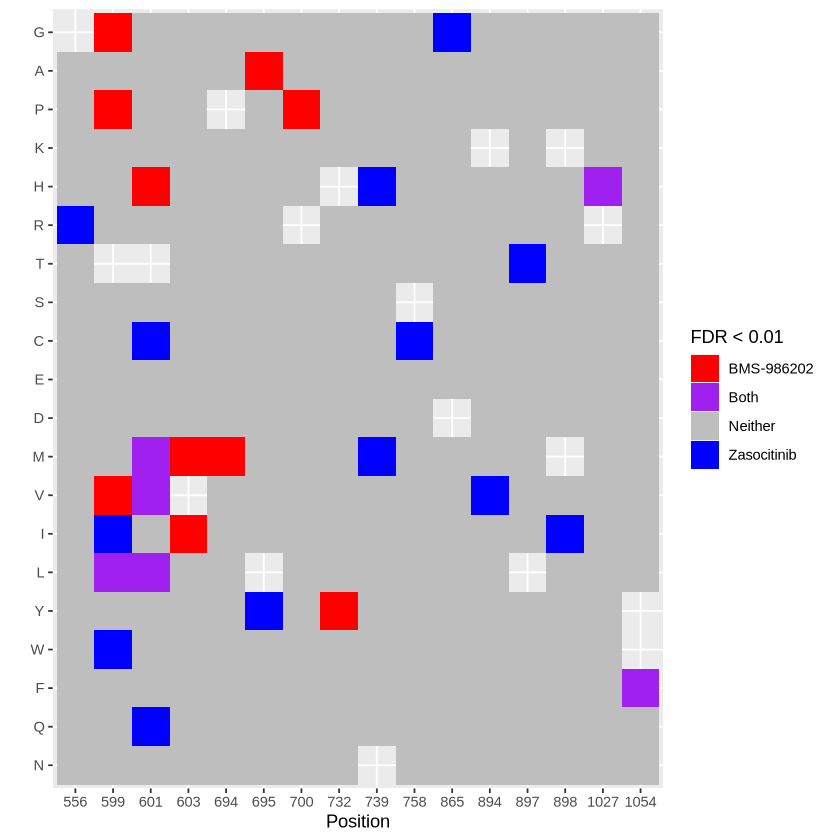

In [ ]:
bms_poten <- compute_difference(test = "IFNalpha100+BMS-986202_2e-08",
                                control = "IFNalpha100_0",
                                assay3) 

zaso_poten <- compute_difference(test = "IFNalpha100+Zasocitinib_7e-09",
                                control = "IFNalpha100_0",
                                assay3) 

sumstats_potentiate <- bind_rows(bms_poten, zaso_poten) %>%
    mutate(statistic = log2FoldChange / log2StdError,
           p.value = (1 - pnorm(abs(statistic))) * 2,
           FDR = p.adjust(p.value, method = "BH"),
           drug = gsub("_.*", "", condition)) %>%
    filter(aa %in% aa_order) %>%
    select(pos, drug, aa, statistic, FDR) %>%
    pivot_wider(names_from = drug, values_from = c(statistic, FDR)) %>%
    mutate("FDR < 0.01" = case_when(`FDR_IFNalpha100+BMS-986202` < 0.01 & `FDR_IFNalpha100+Zasocitinib` > 0.01 ~ "BMS-986202",
                               `FDR_IFNalpha100+BMS-986202` > 0.01 & `FDR_IFNalpha100+Zasocitinib` < 0.01 ~ "Zasocitinib",
                               `FDR_IFNalpha100+BMS-986202` < 0.01 & `FDR_IFNalpha100+Zasocitinib` < 0.01 ~ "Both",
                               TRUE ~ "Neither"),
           `FDR < 0.01` = if_else(`statistic_IFNalpha100+BMS-986202` > 0,
                                 "Neither",
                                 `FDR < 0.01`),
           aa = factor(aa, levels = aa_order))

sig_positions_potentiate <- sumstats_potentiate %>% filter(`FDR < 0.01` != "Neither") %>% pull(pos) %>% unique()
prepped_data_potentiate <- sumstats_potentiate %>% filter(pos %in% sig_positions_potentiate)
names(prepped_data_potentiate)<- c("pos", "aa", "Z_BMS", "Z_ZASO",
                                   "FDR_BMS", "FDR_ZASO", "FDR < 0.01")

plot_chemical_footprint(prepped_data_potentiate)

### format data to be compatible for querying

From the `aux` folder, we can see that the wt-aa sequence matches with the Unitprot P29597 sequence of TYK2

Let's reconstrcut this into HGVS compatible sequences, so then I can query that more easily against external databases.

In [11]:
# read in WT sequence
wt_seq <- read_tsv(file.path("~/bms-dms/aux/tyk2-wt-aa.tsv"))

Rows: 1187 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): wt_aa
dbl (1): pos

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
wt_seq |> head()

wt_aa,pos
<chr>,<dbl>
M,1
P,2
L,3
R,4
H,5
W,6


In [ ]:
sumstats_resist <- sumstats_resist |> left_join(wt_seq, by = c("pos"))


In [14]:
sumstats_resist |> head()

pos,aa,statistic_contrast_IFNalpha+BMS-986202_1e-06,statistic_contrast_IFNalpha+Zasocitinib_1e-06,fdr_contrast_IFNalpha+BMS-986202_1e-06,fdr_contrast_IFNalpha+Zasocitinib_1e-06,FDR < 0.01,wt_aa
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
652,C,-0.13904284,-0.4460409,0.9889464,0.9530300,Neither,A
652,D,-0.77618743,-0.4471692,0.8904416,0.9528962,Neither,A
652,E,-0.08929874,0.3658051,0.9930919,0.9639854,Neither,A
652,F,0.05927916,1.3355011,0.9963765,0.6826364,Neither,A
652,G,-0.09839479,1.6096040,0.9925892,0.5375576,Neither,A
652,H,-1.12504206,0.9252303,0.7745543,0.8483607,Neither,A


In [15]:
one_letter_to_three <- c(
  "A" = "Ala", "R" = "Arg", "N" = "Asn", "D" = "Asp", "C" = "Cys",
  "Q" = "Gln", "E" = "Glu", "G" = "Gly", 'H' = "His", "I" = "Ile",
  'L' = "Leu", "K" = "Lys", 'M' = "Met", 'F' = "Phe", 'P' = "Pro",
  "S" = "Ser", "T" = "Thr", "W" = "Trp", "Y" = "Tyr", "V" = "Val"
)

sumstats_resist <- sumstats_resist |>
  mutate(
    ref3 = one_letter_to_three[wt_aa],
    alt3 = one_letter_to_three[as.character(aa)],
    # Protein-level HGVS referring to the *gene symbol*:
    hgvs_p = paste0("TYK2:p.", ref3, pos, alt3),
    # If you later decide on an Ensembl protein ID, you can switch to:
    hgvs_p_ENSP = paste0("ENSP00000431885.1:p.", ref3, pos, alt3) 
    # there are several ENSP mapping for TYK2, I'm guessing there might be different variants or isoforms. 
  )

In [16]:
sumstats_resist |> head()

pos,aa,statistic_contrast_IFNalpha+BMS-986202_1e-06,statistic_contrast_IFNalpha+Zasocitinib_1e-06,fdr_contrast_IFNalpha+BMS-986202_1e-06,fdr_contrast_IFNalpha+Zasocitinib_1e-06,FDR < 0.01,wt_aa,ref3,alt3,hgvs_p,hgvs_p_ENSP
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
652,C,-0.13904284,-0.4460409,0.9889464,0.9530300,Neither,A,Ala,Cys,TYK2:p.Ala652Cys,ENSP00000431885.1:p.Ala652Cys
652,D,-0.77618743,-0.4471692,0.8904416,0.9528962,Neither,A,Ala,Asp,TYK2:p.Ala652Asp,ENSP00000431885.1:p.Ala652Asp
652,E,-0.08929874,0.3658051,0.9930919,0.9639854,Neither,A,Ala,Glu,TYK2:p.Ala652Glu,ENSP00000431885.1:p.Ala652Glu
652,F,0.05927916,1.3355011,0.9963765,0.6826364,Neither,A,Ala,Phe,TYK2:p.Ala652Phe,ENSP00000431885.1:p.Ala652Phe
652,G,-0.09839479,1.6096040,0.9925892,0.5375576,Neither,A,Ala,Gly,TYK2:p.Ala652Gly,ENSP00000431885.1:p.Ala652Gly
652,H,-1.12504206,0.9252303,0.7745543,0.8483607,Neither,A,Ala,His,TYK2:p.Ala652His,ENSP00000431885.1:p.Ala652His


In [17]:
# generate specific resistant variants

BMS_resistant <- sumstats_resist |> filter(`FDR < 0.01` == "BMS-986202")
ZASO_resistant <- sumstats_resist |> filter(`FDR < 0.01` == "Zasocitinib")
Both_resistant <- sumstats_resist |> filter(`FDR < 0.01` == "Both")

In [ ]:
sumstats_potentiate <- sumstats_potentiate |> left_join(wt_seq, by = c("pos"))
sumstats_potentiate <- sumstats_potentiate |>
  mutate(
    ref3 = one_letter_to_three[wt_aa],
    alt3 = one_letter_to_three[as.character(aa)],
    # Protein-level HGVS referring to the *gene symbol*:
    hgvs_p = paste0("TYK2:p.", ref3, pos, alt3),
    # If you later decide on an Ensembl protein ID, you can switch to:
    hgvs_p_ENSP = paste0("ENSP00000431885.1:p.", ref3, pos, alt3) 
    # there are several ENSP mapping for TYK2, I'm guessing there might be different variants or isoforms. 
  )

BMS_potentiate <- sumstats_potentiate |> filter(`FDR < 0.01` == "BMS-986202")
ZASO_potentiate <- sumstats_potentiate |> filter(`FDR < 0.01` == "Zasocitinib")
Both_potentiate <- sumstats_potentiate |> filter(`FDR < 0.01` == "Both")

### query ClinVar/dbSNP

In [17]:
library(httr)
library(jsonlite)
library(purrr)
library(tibble)


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [18]:
# 1. Some test HGVS protein strings (you'll replace with your own)
# hgvs_vec <- c(
#   "ENSP00000431885.1:p.Ala53Thr",
#   "ENSP00000431885.1:p.Pro1104Ala"  # famous TYK2 variant, should resolve
# )

hgvs_vec <- ZASO_resistant$hgvs_p_ENSP

# 2. Function to call Ensembl Variant Recoder correctly
query_variant_recoder <- function(hgvs_vec) {
  url <- "https://rest.ensembl.org/variant_recoder/homo_sapiens"
  
  # Ensembl expects JSON with a field called "ids"
  body <- list(ids = hgvs_vec)
  
  resp <- httr::POST(
    url,
    body   = body,
    encode = "json",                    # httr sets Content-Type + JSON encoding
    httr::accept("application/json")
  )
  
  if (httr::status_code(resp) != 200) {
    cat("Status:", httr::status_code(resp), "\n")
    cat("Body:\n", httr::content(resp, as = "text"), "\n")
    stop("Variant Recoder request failed")
  }
  
  jsonlite::fromJSON(httr::content(resp, as = "text", encoding = "UTF-8"),
                     flatten = FALSE)
}

raw_recoder <- query_variant_recoder(hgvs_vec)
str(raw_recoder, max.level = 1)

# hmm, even this test samples of data would give us a lot of multiple matches. and the output from the list are 
# kinda werid? why is it "A" and "G"? Seems like an issue coming from flattening 

'data.frame':	32 obs. of  24 variables:
 $ TTT:'data.frame':	32 obs. of  5 variables:
 $ TTC:'data.frame':	32 obs. of  5 variables:
 $ G  :'data.frame':	32 obs. of  6 variables:
 $ TT :'data.frame':	32 obs. of  5 variables:
 $ CT :'data.frame':	32 obs. of  5 variables:
 $ GT :'data.frame':	32 obs. of  5 variables:
 $ TGG:'data.frame':	32 obs. of  5 variables:
 $ TAC:'data.frame':	32 obs. of  5 variables:
 $ TAT:'data.frame':	32 obs. of  5 variables:
 $ TG :'data.frame':	32 obs. of  5 variables:
 $ GA :'data.frame':	32 obs. of  5 variables:
 $ GAG:'data.frame':	32 obs. of  5 variables:
 $ GAA:'data.frame':	32 obs. of  5 variables:
 $ GG :'data.frame':	32 obs. of  5 variables:
 $ T  :'data.frame':	32 obs. of  6 variables:
 $ TGC:'data.frame':	32 obs. of  5 variables:
 $ TGT:'data.frame':	32 obs. of  5 variables:
 $ A  :'data.frame':	32 obs. of  5 variables:
 $ C  :'data.frame':	32 obs. of  5 variables:
 $ AAC:'data.frame':	32 obs. of  5 variables:
 $ AAT:'data.frame':	32 obs. of  5 varia

In [19]:
# seems like the output will look at possible nucleotide changes, and in each there will be each row one of the query
# and ones with id, are the ones that are found in dbsnp or clinvar. those are known variants.

#let's do a bit of cleaning

# first convert NULL to NAs

raw_recoder <- as.list(raw_recoder)
raw_recoder <- map(raw_recoder, function(df) {
  df[df == "NULL"] <- NA
  return(df)
})
raw_recoder <- map(raw_recoder, function(df) return(df[!rowSums(is.na(df)) == ncol(df), ]))
raw_recoder <- do.call(bind_rows, raw_recoder)
raw_recoder <-raw_recoder |> mutate(id = ifelse(id == "NULL", NA, id))
ZASO_resistant_known_variants <- raw_recoder |> filter(!is.na(id)) |> pull(id) |> unique()
ZASO_resistant_known_variants <- unlist(ZASO_resistant_known_variants)

#### query myvariant.info

it's one of the newer db aggregator services, that supposedly pull info from clinVar and snpdb, should be more than enough for what we want.

In [ ]:
`%||%` <- function(x, y) if (is.null(x)) y else x

query_myvariant_one <- function(rs) {
  base_url <- "https://myvariant.info/v1/query"
  
  resp <- GET(
    base_url,
    query = list(
      q      = rs,
      fields = "clinvar,gnomad,dbsnp",
      size   = 1
    )
  )
  stop_for_status(resp)
  
  return(resp)
  dat <- fromJSON(content(resp, as = "text", encoding = "UTF-8"))
  if (length(dat$hits) == 0) return(NULL)
  
  hit <- dat$hits
  
}



In [62]:
`%||%` <- function(x, y) if (is.null(x)) y else x

parse_myvariant_hit <- function(hit, fallback_rsid = NA_character_) {
  # top-level
  mv_id  <- hit$`_id`        %||% NA_character_
  mv_scr <- hit$`_score`     %||% NA_real_
  clin   <- hit$clinvar
  dbs    <- hit$dbsnp
  
  ## ---- ClinVar bits ----
  if (!is.null(clin)) {
    # rcv is usually a 1-row df
    clin_sig    <- clin$rcv$clinical_significance[1] %||% NA_character_
    clin_name   <- clin$rcv$conditions$name[1]       %||% NA_character_
    clin_pref   <- clin$rcv$preferred_name[1]        %||% NA_character_
    clin_review <- clin$rcv$review_status[1]         %||% NA_character_
    clin_acc    <- clin$rcv$accession[1]             %||% NA_character_
  } else {
    clin_sig <- clin_name <- clin_pref <- clin_review <- clin_acc <- NA_character_
  }
  
  ## ---- dbSNP + gnomAD/ExAC AFs ----
  rsid         <- fallback_rsid
  chrom_hg19   <- NA_character_
  pos_hg19     <- NA_real_
  ref_allele   <- NA_character_
  alt_allele   <- NA_character_
  exac_af      <- NA_real_
  gnomad_af    <- NA_real_
  exac_rf      <- NA_real_
  gnomad_rf    <- NA_real_
  
  if (!is.null(dbs)) {
    rsid       <- dbs$rsid[1]       %||% fallback_rsid
    chrom_hg19 <- dbs$chrom[1]      %||% NA_character_
    ref_allele <- dbs$ref[1]        %||% NA_character_
    alt_allele <- dbs$alt[1]        %||% NA_character_
    
    if (!is.null(dbs$hg19)) {
      pos_hg19 <- dbs$hg19$start[1] %||% NA_real_
    }
    
    # alleles / freq flattening
    if (!is.null(dbs$alleles[[1]])) {
      alleles_df <- dbs$alleles[[1]]          # 2-row df: allele + freq (nested)
      flat <- alleles_df %>%
        tidyr::unnest_wider(freq)             # -> allele | exac | gnomad_exomes
      
      alt_row <- flat %>% filter(allele == alt_allele)
      if (nrow(alt_row) == 1) {
        exac_af   <- alt_row$exac[1]          %||% NA_real_
        gnomad_af <- alt_row$gnomad_exomes[1] %||% NA_real_
      }
      ref_row <- flat %>% filter(allele == ref_allele)
      if (nrow(ref_row) == 1) {
        exac_rf   <- ref_row$exac[1]          %||% NA_real_
        gnomad_rf <- ref_row$gnomad_exomes[1] %||% NA_real_
      }
    }
  }
  
  tibble(
    mv_id                 = mv_id,
    rsid                  = rsid,
    mv_score              = mv_scr,
    chrom_hg19            = chrom_hg19,
    pos_hg19              = pos_hg19,
    ref_hg19              = ref_allele,
    alt_hg19              = alt_allele,
    exac_af               = exac_af,
    gnomad_exome_af       = gnomad_af,
    exac_rf               = exac_rf,
    gnomad_exome_rf       = gnomad_rf,
    clinvar_significance  = clin_sig,
    clinvar_review_status = clin_review,
    clinvar_disease_name  = clin_name,
    clinvar_preferred_name = clin_pref,
    clinvar_accession      = clin_acc
  )
}


In [22]:
ZASO_known_vairants_list <- list()
for (i in 1:length(ZASO_resistant_known_variants[1:2])) {
  resp <- query_myvariant_one(ZASO_resistant_known_variants[i])
  dat <- fromJSON(content(resp, as = "text", encoding = "UTF-8"))
  hit <- dat$hits
  ZASO_known_vairants_list[[i]] <- parse_myvariant_hit(hit)
}
ZASO_known_vairants_df <- bind_rows(ZASO_known_vairants_list)


In [40]:
bind_rows(ZASO_known_vairants_list)

mv_id,rsid,mv_score,chrom_hg19,pos_hg19,ref_hg19,alt_hg19,exac_af,gnomad_exome_af,exac_rf,gnomad_exome_rf,clinvar_significance,clinvar_review_status,clinvar_disease_name,clinvar_preferred_name,clinvar_accession
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr19:g.10472480T>C,rs745986684,1.664188,19,10472480,T,C,0,0,1,1,Uncertain significance,"criteria provided, single submitter",Immunodeficiency 35 (IMD35),NM_003331.5(TYK2):c.1925A>G (p.Lys642Arg),RCV001872815
chr19:g.10469946G>A,rs751325446,13.914343,19,10469946,G,A,0,0,1,1,NA,NA,NA,NA,NA


In [ ]:
write_csv(bind_rows(ZASO_known_vairants_list), "ZASO_known_vairants_resistant_list.csv")

Warning message in rm(raw_recoder):
“object 'raw_recoder' not found”


### expand to other variants

In [25]:
raw_recoder_both <- query_variant_recoder(Both_resistant$hgvs_p_ENSP)
str(raw_recoder_both, max.level = 1)

'data.frame':	26 obs. of  26 variables:
 $ TAC:'data.frame':	26 obs. of  5 variables:
 $ TAT:'data.frame':	26 obs. of  5 variables:
 $ GA :'data.frame':	26 obs. of  5 variables:
 $ T  :'data.frame':	26 obs. of  6 variables:
 $ CA :'data.frame':	26 obs. of  5 variables:
 $ G  :'data.frame':	26 obs. of  6 variables:
 $ AA :'data.frame':	26 obs. of  5 variables:
 $ AG :'data.frame':	26 obs. of  5 variables:
 $ AAG:'data.frame':	26 obs. of  5 variables:
 $ AAA:'data.frame':	26 obs. of  5 variables:
 $ ATG:'data.frame':	26 obs. of  5 variables:
 $ CG :'data.frame':	26 obs. of  5 variables:
 $ TA :'data.frame':	26 obs. of  5 variables:
 $ TTC:'data.frame':	26 obs. of  5 variables:
 $ TTT:'data.frame':	26 obs. of  5 variables:
 $ CC :'data.frame':	26 obs. of  5 variables:
 $ A  :'data.frame':	26 obs. of  6 variables:
 $ GAC:'data.frame':	26 obs. of  5 variables:
 $ GAT:'data.frame':	26 obs. of  5 variables:
 $ GAA:'data.frame':	26 obs. of  5 variables:
 $ GAG:'data.frame':	26 obs. of  5 varia

In [26]:
raw_recoder_both <- as.list(raw_recoder_both)
raw_recoder_both <- map(raw_recoder_both, function(df) {
  df[df == "NULL"] <- NA
  return(df)
})
raw_recoder_both <- map(raw_recoder_both, function(df) return(df[!rowSums(is.na(df)) == ncol(df), ]))
raw_recoder_both <- do.call(bind_rows, raw_recoder_both)
raw_recoder_both <-raw_recoder_both |> mutate(id = ifelse(id == "NULL", NA, id))
Both_resistant_known_variants <- raw_recoder_both |> filter(!is.na(id)) |> pull(id) |> unique()
Both_resistant_known_variants <- unlist(Both_resistant_known_variants)

In [27]:
Both_resistant_known_variants

[1] "COSV53389717"  "CM1613127"     "rs367584686"   "COSV104588236"

In [29]:
Both_resistant_known_variants <- Both_resistant_known_variants[grepl("^rs", Both_resistant_known_variants)]
Both_resistant_known_variants

[1] "rs367584686"

In [ ]:
Both_known_variants_list <- list()
for (i in 1:length(Both_resistant_known_variants)) {
  resp <- query_myvariant_one(Both_resistant_known_variants[i])
  dat <- fromJSON(content(resp, as = "text", encoding = "UTF-8"))
  hit <- dat$hits
  Both_known_variants_list[[i]] <- parse_myvariant_hit(hit)
}
Both_known_vairants_df <- bind_rows(Both_known_variants_list)
write_csv(Both_known_vairants_df, "Both_known_vairants_resistant_list.csv")
rm(raw_recoder_both)

In [ ]:
#okay, in principle, this should work to upscale. we just need to clean up the code, and then
# scale it to everything.
parse_myvariant_hit(dat$hits)

mv_id,rsid,mv_score,chrom_hg19,pos_hg19,ref_hg19,alt_hg19,exac_af,gnomad_exome_af,exac_rf,gnomad_exome_rf,clinvar_significance,clinvar_review_status,clinvar_disease_name,clinvar_preferred_name,clinvar_accession
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr19:g.10472480T>C,rs745986684,1.664188,19,10472480,T,C,0,0,1,1,Uncertain significance,"criteria provided, single submitter",Immunodeficiency 35 (IMD35),NM_003331.5(TYK2):c.1925A>G (p.Lys642Arg),RCV001872815


In [ ]:
BMS_raw_recoder <- query_variant_recoder(BMS_resistant$hgvs_p_ENSP)
str(BMS_raw_recoder, max.level = 1)

raw_recoder_bms <- as.list(BMS_raw_recoder)
raw_recoder_bms <- map(raw_recoder_bms, function(df) {
  df[df == "NULL"] <- NA
  return(df)
})
raw_recoder_bms <- map(raw_recoder_bms, function(df) return(df[!rowSums(is.na(df)) == ncol(df), ]))
raw_recoder_bms <- do.call(bind_rows, raw_recoder_bms)
raw_recoder_bms <-raw_recoder_bms |> mutate(id = ifelse(id == "NULL", NA, id))
BMS_resistant_known_variants <- raw_recoder_bms |> filter(!is.na(id)) |> pull(id) |> unique()
BMS_resistant_known_variants <- unlist(BMS_resistant_known_variants)

In [ ]:
BMS_resistant_known_variants
# no known variatns in clinvar or dbsnp for these variants

[1] "COSV53389717" "COSV53389599"

In [24]:
rm(raw_recoder_bms)

### look for potentiating variants

In [ ]:
# Zasocitinib potentiate    
raw_recoder_zaso <- query_variant_recoder(ZASO_potentiate$hgvs_p_ENSP)
str(raw_recoder_zaso, max.level = 1)

'data.frame':	13 obs. of  12 variables:
 $ T  :'data.frame':	13 obs. of  5 variables:
 $ AC :'data.frame':	13 obs. of  5 variables:
 $ GT :'data.frame':	13 obs. of  5 variables:
 $ C  :'data.frame':	13 obs. of  5 variables:
 $ TG :'data.frame':	13 obs. of  5 variables:
 $ G  :'data.frame':	13 obs. of  5 variables:
 $ TAT:'data.frame':	13 obs. of  5 variables:
 $ TAC:'data.frame':	13 obs. of  5 variables:
 $ CAG:'data.frame':	13 obs. of  5 variables:
 $ CAA:'data.frame':	13 obs. of  5 variables:
 $ A  :'data.frame':	13 obs. of  6 variables:
 $ TGG:'data.frame':	13 obs. of  5 variables:


In [31]:
raw_recoder_zaso <- as.list(raw_recoder_zaso)
raw_recoder_zaso <- map(raw_recoder_zaso, function(df) {
  df[df == "NULL"] <- NA
  return(df)
})
raw_recoder_zaso <- map(raw_recoder_zaso, function(df) return(df[!rowSums(is.na(df)) == ncol(df), ]))
raw_recoder_zaso <- do.call(bind_rows, raw_recoder_zaso)
raw_recoder_zaso <-raw_recoder_zaso |> mutate(id = ifelse(id == "NULL", NA, id))
Zaso_potentiate_known_variants <- raw_recoder_zaso |> filter(!is.na(id)) |> pull(id) |> unique()
Zaso_potentiate_known_variants <- unlist(Zaso_potentiate_known_variants)

In [ ]:
Zaso_potentiate_known_variants <- Zaso_potentiate_known_variants[grepl("^rs", Zaso_potentiate_known_variants)]
Zaso_potentiate_known_variants


[1] "rs1355927286"

In [38]:
Zaso_known_variants_list <- list()
for (i in 1:length(Zaso_potentiate_known_variants)) {
  resp <- query_myvariant_one(Zaso_potentiate_known_variants[i])
  dat <- fromJSON(content(resp, as = "text", encoding = "UTF-8"))
  hit <- dat$hits
  Zaso_known_variants_list[[i]] <- parse_myvariant_hit(hit)
}
Zaso_known_vairants_df <- bind_rows(Zaso_known_variants_list)
write_csv(Zaso_known_vairants_df, "Zaso_known_vairants_potentiate_list.csv")
rm(raw_recoder_zaso)

Warning message:
“Unknown or uninitialised column: `exac`.”
Warning message:
“Unknown or uninitialised column: `exac`.”


In [39]:
Zaso_known_vairants_df

mv_id,rsid,mv_score,chrom_hg19,pos_hg19,ref_hg19,alt_hg19,exac_af,gnomad_exome_af,exac_rf,gnomad_exome_rf,clinvar_significance,clinvar_review_status,clinvar_disease_name,clinvar_preferred_name,clinvar_accession
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr19:g.10472943C>T,rs1355927286,13.91473,19,10472943,C,T,NA,0,NA,1,NA,NA,NA,NA,NA


In [40]:
# BMS potentiate    
raw_recoder_bms <- query_variant_recoder(BMS_potentiate$hgvs_p_ENSP)
str(raw_recoder_bms, max.level = 1)

'data.frame':	10 obs. of  11 variables:
 $ T  :'data.frame':	10 obs. of  5 variables:
 $ C  :'data.frame':	10 obs. of  5 variables:
 $ ATG:'data.frame':	10 obs. of  5 variables:
 $ GC :'data.frame':	10 obs. of  5 variables:
 $ CA :'data.frame':	10 obs. of  5 variables:
 $ ATC:'data.frame':	10 obs. of  5 variables:
 $ ATA:'data.frame':	10 obs. of  5 variables:
 $ ATT:'data.frame':	10 obs. of  5 variables:
 $ A  :'data.frame':	10 obs. of  6 variables:
 $ GG :'data.frame':	10 obs. of  5 variables:
 $ GT :'data.frame':	10 obs. of  5 variables:


In [41]:
raw_recoder_bms <- as.list(raw_recoder_bms)
raw_recoder_bms <- map(raw_recoder_bms, function(df) {
  df[df == "NULL"] <- NA
  return(df)
})
raw_recoder_bms <- map(raw_recoder_bms, function(df) return(df[!rowSums(is.na(df)) == ncol(df), ]))
raw_recoder_bms <- do.call(bind_rows, raw_recoder_bms)
raw_recoder_bms <-raw_recoder_bms |> mutate(id = ifelse(id == "NULL", NA, id))
BMS_potentiate_known_variants <- raw_recoder_bms |> filter(!is.na(id)) |> pull(id) |> unique()
BMS_potentiate_known_variants <- unlist(BMS_potentiate_known_variants)

In [42]:
BMS_potentiate_known_variants <- BMS_potentiate_known_variants[grepl("^rs", BMS_potentiate_known_variants)]
BMS_potentiate_known_variants


[1] "rs140594440"

In [43]:
BMS_known_variants_list <- list()
for (i in 1:length(BMS_potentiate_known_variants)) {
  resp <- query_myvariant_one(BMS_potentiate_known_variants[i])
  dat <- fromJSON(content(resp, as = "text", encoding = "UTF-8"))
  hit <- dat$hits
  BMS_known_variants_list[[i]] <- parse_myvariant_hit(hit)
}
BMS_known_vairants_df <- bind_rows(BMS_known_variants_list)
write_csv(BMS_known_vairants_df, "BMS_known_vairants_potentiate_list.csv")
rm(raw_recoder_bms)

In [44]:
BMS_known_vairants_df

mv_id,rsid,mv_score,chrom_hg19,pos_hg19,ref_hg19,alt_hg19,exac_af,gnomad_exome_af,exac_rf,gnomad_exome_rf,clinvar_significance,clinvar_review_status,clinvar_disease_name,clinvar_preferred_name,clinvar_accession
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr19:g.10472598C>T,rs140594440,6.302938,19,10472598,C,T,0,0,1,1,Uncertain significance,"criteria provided, multiple submitters, no conflicts",Immunodeficiency 35 (IMD35),NM_003331.5(TYK2):c.1807G>A (p.Val603Met),RCV000527931


In [45]:
# both potentiate    
raw_recoder_both <- query_variant_recoder(Both_potentiate$hgvs_p_ENSP)
str(raw_recoder_both, max.level = 1)

'data.frame':	6 obs. of  6 variables:
 $ T :'data.frame':	6 obs. of  5 variables:
 $ CT:'data.frame':	6 obs. of  5 variables:
 $ TG:'data.frame':	6 obs. of  5 variables:
 $ GT:'data.frame':	6 obs. of  5 variables:
 $ A :'data.frame':	6 obs. of  6 variables:
 $ TT:'data.frame':	6 obs. of  5 variables:


In [46]:
raw_recoder_both <- as.list(raw_recoder_both)
raw_recoder_both <- map(raw_recoder_both, function(df) {
  df[df == "NULL"] <- NA
  return(df)
})
raw_recoder_both <- map(raw_recoder_both, function(df) return(df[!rowSums(is.na(df)) == ncol(df), ]))
raw_recoder_both <- do.call(bind_rows, raw_recoder_both)
raw_recoder_both <-raw_recoder_both |> mutate(id = ifelse(id == "NULL", NA, id))
Both_potentiate_known_variants <- raw_recoder_both |> filter(!is.na(id)) |> pull(id) |> unique()
Both_potentiate_known_variants <- unlist(Both_potentiate_known_variants)

In [47]:
Both_potentiate_known_variants <- Both_potentiate_known_variants[grepl("^rs", Both_potentiate_known_variants)]
Both_potentiate_known_variants


[1] "rs1387668386"

In [63]:
Both_known_variants_list <- list()
for (i in 1:length(Both_potentiate_known_variants)) {
  hit <- query_myvariant_one(Both_potentiate_known_variants[i])
  if (is.null(hit)) next
  Both_known_variants_list[[i]] <- parse_myvariant_hit(hit)
}

Both_known_vairants_df <- bind_rows(Both_known_variants_list)
write_csv(Both_known_vairants_df, "Both_known_vairants_potentiate_list.csv")
rm(raw_recoder_both)

In [67]:
hit

Response [https://myvariant.info/v1/query?q=rs1387668386&fields=clinvar%2Cgnomad%2Cdbsnp&size=1]
  Date: 2025-12-04 12:08
  Status: 200
  Content-Type: application/json; charset=UTF-8
  Size: 8.3 kB
